## Import Package

In [602]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

## Import Dataset 

In [677]:
df = pd.read_excel("data/SEKTOR-KULINER.xls", index_col="no")
df

,produksi,asset,penjualan,pekerja
no,,,,
1,0,6000000,7500000,3
2,1500,2900000,3750000,1
3,1800,3500000,4500000,1
4,0,1400000,1500000,1
5,450,1900000,3150000,1
...,...,...,...,...
6319,0,5600000,3500000,1
6320,600,14000000,5000000,2
6321,1800,13000000,144000,1


## Data Analysis

In [678]:
data = df.drop(df[df.produksi == 0].index, inplace=True)

In [679]:
data = df.drop(df[df.asset == 0].index, inplace=True)

In [680]:
data = df.drop(df[df.penjualan == 0].index, inplace=True)

In [681]:
df.shape

(2371, 4)

In [682]:
df

,produksi,asset,penjualan,pekerja
no,,,,
2,1500,2900000,3750000,1
3,1800,3500000,4500000,1
5,450,1900000,3150000,1
7,700,11000000,11000000,1
8,600,1200000,1800000,1
...,...,...,...,...
6317,1000,10500000,7000000,2
6320,600,14000000,5000000,2
6321,1800,13000000,144000,1


## K-Means Clustering

In [683]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

### Menentukan K (n_cluster) tanpa label -> Inertia/Elbow Analysis

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:08<00:00,  2.68it/s]


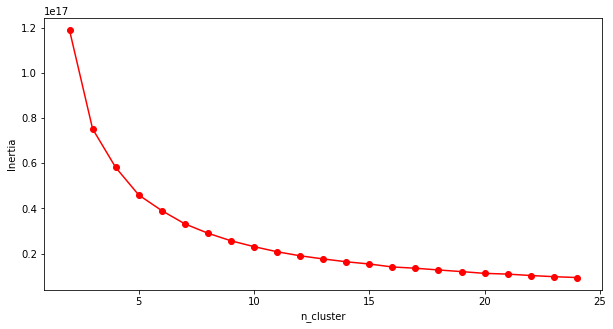

In [684]:
score = []

for k in tqdm(range(2, 25)):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(df)
    score.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(2,25), score, "r-o")
plt.ylabel("Inertia")
plt.xlabel("n_cluster");

### Training

In [694]:
model = KMeans(n_clusters=3)
member = model.fit_predict(df)

In [695]:
df_pred = df.copy()
df_pred['cluster predict'] = member
df_pred.head()

,produksi,asset,penjualan,pekerja,cluster predict
no,,,,,
2,1500,2900000,3750000,1,2
3,1800,3500000,4500000,1,2
5,450,1900000,3150000,1,2
7,700,11000000,11000000,1,1
8,600,1200000,1800000,1,2


### Analyze Cluster

In [696]:
cluster = (model.cluster_centers_)

In [697]:
df_param = pd.DataFrame(cluster, columns=df.columns)
df_param

,produksi,asset,penjualan,pekerja
0,1151.213115,3.329850e+07,8.118623e+06,2.062295
1,45931.917329,1.424732e+07,7.953385e+06,1.926868
2,145627.476688,3.547292e+06,3.028737e+06,1.518441


In [698]:
pd.DataFrame(df.mean(),columns=['Mean'])

# produksi : 100594/bks
# asset : 10 jt/bulan
# penjualan : 4-5jt/bulan
# pekerja : 1-2 org

df.describe()

,produksi,asset,penjualan,pekerja
count,2.371000e+03,2.371000e+03,2.371000e+03,2371.000000
mean,1.005943e+05,1.021302e+07,4.989943e+06,1.696752
std,9.498994e+05,1.076464e+07,4.554796e+06,1.144601
min,1.000000e+00,3.400000e+04,1.500000e+02,0.000000
25%,1.000000e+02,2.250000e+06,1.750000e+06,1.000000
50%,3.000000e+02,6.100000e+06,3.500000e+06,1.000000
75%,9.000000e+02,1.400000e+07,6.500000e+06,2.000000
max,1.600000e+07,4.980000e+07,2.400000e+07,14.000000


`cluster 0 :`produksi `[rendah]`, asset 33 jt/bulan `[tinggi]`, penjualan >= 8jt/bulan `[tinggi]`, dan pekerja > 2 orang `[tinggi]` 
<br> -------> <b>`Besar`</b>

`cluster 1 :`produksi `[sedang]` , asset >= 10 jt/bulan `[sedang]`, penjualan >= 7jt/bulan `[tinggi]`, dan pekerja >= 2 orang `[sedang]` 
<br> -------> <b>`Menengah`</b>

`cluster 2 :`produksi `[tinggi]`, asset >= 3jt/bulan `[rendah]`, penjualan <= 3jt/bulan `[rendah]`, dan pekerja >= 2 orang `[sedang]` 
<br> -------> <b>`Kecil`</b>

In [699]:
df_pred.to_excel("output_cluster.xlsx")